# A Look Into San Francisco Crime 2003-2019 

In 2019, attention to serious crimes has been brought to the eyes of the public. Through September 1 this year alone, there have been a recorded 283 mass shootings (*Gun Violence Archive*) in 2019. The number of mass shootings has surpassed the number of days that have passed in the year. When we go out to events or visit public places, we want to feel safe and know that our friends and family will not be at harm. Current events have sparked an interest in me to deeply explore crime patterns in San Francisco, which is a major city that I have lived near my entire life. San Francisco has a population of ~880,000 with a size of 46.87 mi<sup>2</sup>. With such a dense area and wide variety of people, San Francisco is prone to crime. Answering questions such as *What time of the year are crimes most likely to happen?* and *Are certain areas of San Francisco more prone to crime?* can help visitors and inhabitants stay safe. I will be observing crime reports from San Francisco's Opendata platform (*https://datasf.org/opendata/*), dating from 2003 to 2019. I have cleaned and consolidated the data for comprehensibility, and I will be addressing vital questions for understanding crime patterns in San Francisco throughout the years. 

In [111]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 
from matplotlib import cm
import datetime as dt

In [3]:
# Grab dataframe containing police reports
# Create df on Macbook
# df = pd.read_csv("/Users/garrettyamane/Desktop/Springboard/capstone_project_1_data/merged.csv")

# Create df on PC
df = pd.read_csv("/Users/Garrett/Desktop/Springboard/capstone_project_1_data/merged.csv")
df = df.drop(columns='Unnamed: 0')
df.head()

,Incident Number,Incident Category,Incident Description,Incident Day of Week,Incident Date,Incident Time,Police District,Resolution,Intersection,Longitude,Latitude,point,Row ID,Incident Year,Analysis Neighborhood
0,100087859,"SEX OFFENSES, FORCIBLE",ANNOY OR MOLEST CHILDREN,Wednesday,2003-01-01,00:01,SOUTHERN,COMPLAINANT REFUSES TO PROSECUTE,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",10008785914010,2003,South of Market
1,91139945,"SEX OFFENSES, FORCIBLE",SEXUAL BATTERY,Wednesday,2003-01-01,00:01,BAYVIEW,DISTRICT ATTORNEY REFUSES TO PROSECUTE,200 Block of BRIDGEVIEW DR,-122.397590,37.734209,"(37.7342093398821, -122.397590096788)",9113994504144,2003,Bayview Hunters Point
2,81360718,EMBEZZLEMENT,"EMBEZZLEMENT, GRAND THEFT BY EMPLOYEE",Wednesday,2003-01-01,00:01,RICHMOND,NONE,2900 Block of PACIFIC AV,-122.443835,37.792137,"(37.7921365604231, -122.443835267233)",8136071810045,2003,Pacific Heights
3,81313927,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01,00:01,MISSION,NONE,500 Block of GUERRERO ST,-122.424037,37.762751,"(37.7627513875316, -122.424036887526)",8131392764070,2003,Mission
4,81183231,FORGERY/COUNTERFEITING,"FORGERY, DRIVERS LICENSE OR ID-CARD",Wednesday,2003-01-01,00:01,NORTHERN,NONE,3000 Block of FILLMORE ST,-122.435517,37.797573,"(37.7975726990109, -122.435517480769)",8118323109120,2003,Marina


# How has crime report rate changed since 2003?

In [4]:
# Get Series of Year and the number of crime reports for that year
num_reports_by_year = df['Incident Year'].value_counts().sort_index()

# Drop 2019 from num_reports_by_year since 2019 is not fully updated
num_reports_by_year = num_reports_by_year[0:16]

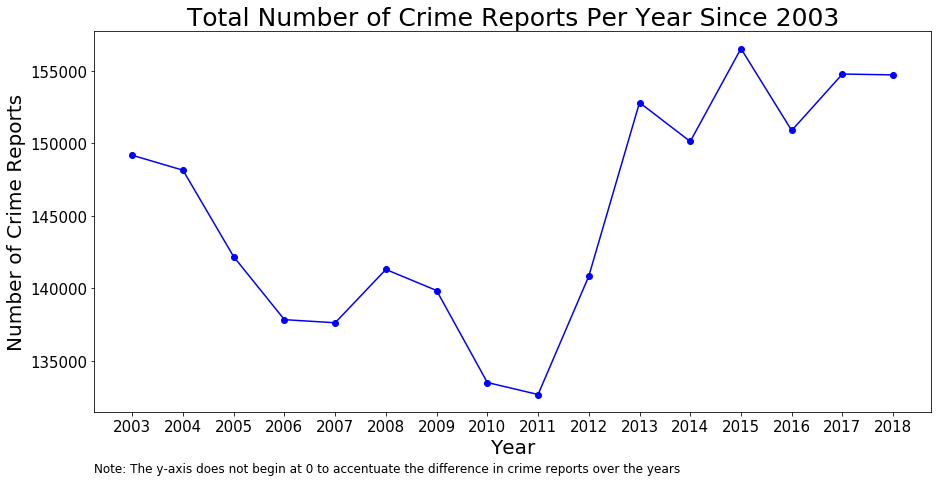

In [5]:
# Create figure for number of crime reports and plot
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(num_reports_by_year.index, num_reports_by_year.values, 'o-b')

# Set title and axis labels
ax.set_title("Total Number of Crime Reports Per Year Since 2003", fontsize=25)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Number of Crime Reports", fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

# Show all years on x-axis
plt.xticks(num_reports_by_year.index)

# Add footnote
plt.annotate('Note: The y-axis does not begin at 0 to accentuate the difference in crime reports over the years', (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=12)

plt.show()

In [6]:
print("Average Number of Reports Per Year:", num_reports_by_year.mean())
print("Minimum Number of Reports:", min(num_reports_by_year))
print("Maximum Number of Reports:", max(num_reports_by_year))

Average Number of Reports Per Year: 145191.875
Minimum Number of Reports: 132697
Maximum Number of Reports: 156526


I first want to emphasize that I did not choose to include crime reports from 2019 in this chart due to the calendar year not being fully over. I didn't want the chart to have a major dip for 2019 and create a bias in crime rate because of this, so I chose to omit the point.

### Response:

Moving on, I think that there are a couple of interesting things to takeaway from the chart. Beginning in 2003, the number of yearly crime reports was already high relative to average number of crime reports per year. However, there was a steady decline until it reached the lowest point in 2011. Since then, the number of reports per year has been increasing and I believe this is a good motivator to look deeper into why this may be. What patterns since 2011 can we observe in crime reports that may be a cause of the increase? And how can we use this to prevent/prepare for future crime in San Francisco? These types of questions drive the exploration of this data and are key to improving the safety of visitor and inhabitants in San Francisco.

# What types of crimes are reported the most?

The dataframe that I am referencing consists of two dataframes that I merged together. One dataframe had crime reports from 2003-2017, and the other dataframe had reports beginning in 2018 and continues to 2019. Because of the two different dataframes that I merged, the "Incident Category" column has some values that are very similar but are treated differently due to the wording. For example, "LARCENY/THEFT" and "Larceny Theft" are treated as unique values yet it is clear that they are referring to the same crime category. I can tell that they were taken from the different dataframes that I mentioned above because one row has the category in all uppercase letters and the other row does not. "LARCENY/THEFT" comes from the dataframe containing reports from 2003-2017 and "Larceny Theft" comes from the dataframe containing reports beginning on 2018. Because of this difference, I will examine the 2003-2017 reports separately from the 2018-2019 reports and compare the results. This will not only let me distinguish these types of scenarios, but I can also examine recent crime report trends in San Francisco by looking at the most recent years and comparing the results to those of the past.

Below is an example of the situation that I will address:

In [7]:
# Show the case where two unique crime categories refer to the same type
"LARCENY/THEFT" in list(df["Incident Category"]) and "Larceny Theft" in list(df["Incident Category"])

True

In [8]:
# Get categories from 2003-2017
past_categories = df[df["Incident Year"] < 2018]["Incident Category"]

# Get categries 2018-2019
recent_categories = df[df["Incident Year"] > 2017]["Incident Category"]

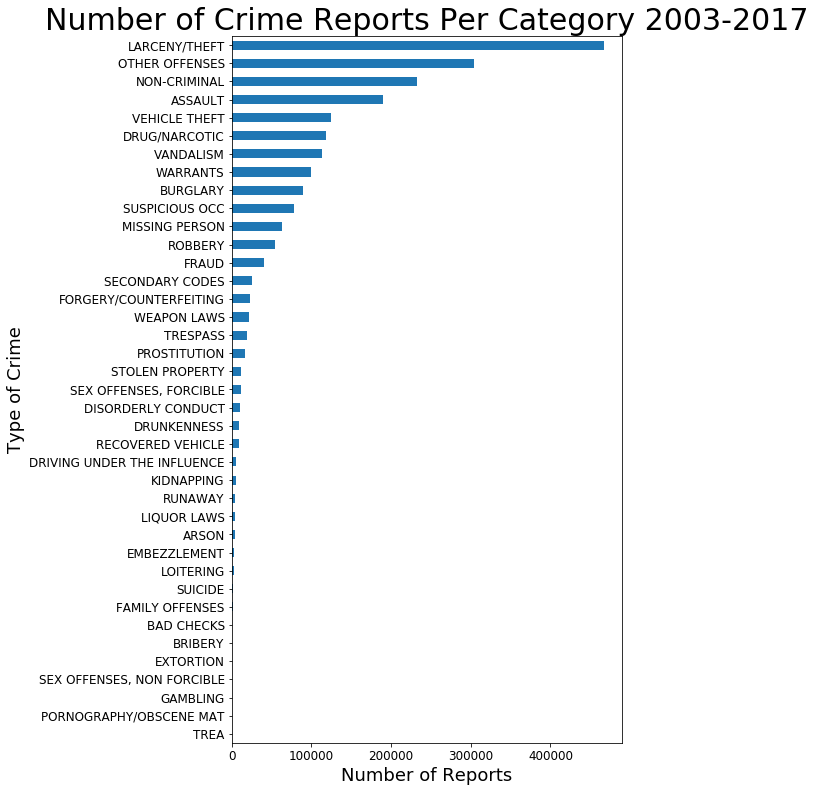

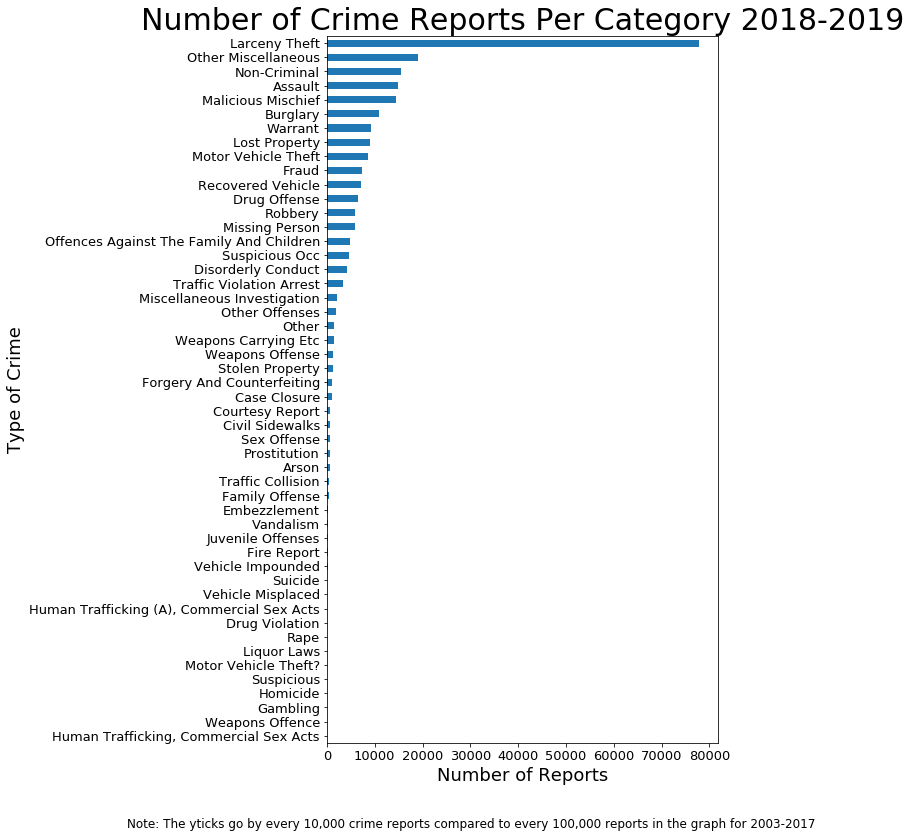

In [82]:
# Create figure for Crime Reports per Category 2003-2017
ax1 = past_categories.value_counts().sort_values().plot(kind='barh', figsize=(7, 13), fontsize=12)

# Set title and axes labels
ax1.set_title("Number of Crime Reports Per Category 2003-2017", fontsize=30)
ax1.set_xlabel("Number of Reports", fontsize=18)
ax1.set_ylabel("Type of Crime", fontsize=18)

plt.show()

# Create figure for Crime Reports per Category 2018-2019
ax2 = recent_categories.value_counts().sort_values().plot(kind='barh', figsize=(7,13), fontsize=13)

# Set title and axes labels
ax2.set_title("Number of Crime Reports Per Category 2018-2019", fontsize=30)
ax2.set_xlabel("Number of Reports", fontsize=18)
ax2.set_ylabel("Type of Crime", fontsize=18)

# Add footnote to notice ytick difference
plt.annotate('Note: The yticks go by every 10,000 crime reports compared to every 100,000 reports in the graph for 2003-2017', (0,0), (-200, -75), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=12)

plt.show()

In [84]:
# Prints top ten most common categories from startyear to endyear and the corresponding percentage of all crimes reported
def print_top_ten(categories, startyear, endyear):
    print("Top Ten Crimes Reported from", startyear, "to", endyear, "\n")
    for category,count in Counter(categories.tolist()).most_common(10):
        print(category + ":", count, "reports -------", str(round(count / len(categories) * 100, 2)) + "%", "of all crimes reported")

### Resonse:

Let's first explore the top crimes reported for each dataset:

In [11]:
print_top_ten(past_categories, 2003, 2017)

Top Ten Crimes Reported from 2003 to 2017 

LARCENY/THEFT: 466816 reports ------- 21.53% of all crimes reported
OTHER OFFENSES: 303790 reports ------- 14.01% of all crimes reported
NON-CRIMINAL: 233076 reports ------- 10.75% of all crimes reported
ASSAULT: 190095 reports ------- 8.77% of all crimes reported
VEHICLE THEFT: 125127 reports ------- 5.77% of all crimes reported
DRUG/NARCOTIC: 118146 reports ------- 5.45% of all crimes reported
VANDALISM: 113263 reports ------- 5.22% of all crimes reported
WARRANTS: 99761 reports ------- 4.6% of all crimes reported
BURGLARY: 89445 reports ------- 4.13% of all crimes reported
SUSPICIOUS OCC: 78730 reports ------- 3.63% of all crimes reported


In [12]:
print_top_ten(recent_categories, 2018, 2019)

Top Ten Crimes Reported from 2018 to 2019 

Larceny Theft: 77832 reports ------- 31.52% of all crimes reported
Other Miscellaneous: 19099 reports ------- 7.73% of all crimes reported
Non-Criminal: 15417 reports ------- 6.24% of all crimes reported
Assault: 14866 reports ------- 6.02% of all crimes reported
Malicious Mischief: 14407 reports ------- 5.83% of all crimes reported
Burglary: 10950 reports ------- 4.43% of all crimes reported
Warrant: 9308 reports ------- 3.77% of all crimes reported
Lost Property: 9073 reports ------- 3.67% of all crimes reported
Motor Vehicle Theft: 8591 reports ------- 3.48% of all crimes reported
Fraud: 7326 reports ------- 2.97% of all crimes reported


There are a couple of things I observe in these two charts that stand out regarding the most common types of crimes reported. Although larceny/theft crimes were the most common, the overall percentage that this crime category contributed farily significant. From 2003-2017, larceny/theft was 21.53%, whereas from 2018-2019 it was almost at a third of all crimes. This change makes me curious as to why theft rate went up and how this change affected other report types. Nonetheless, the top four most common crimes were the same. Drug/narcotic and vandalism cases dropped out of the top ten in 2018-2019, while lost property and fraud cases became more common. I find it especially interesting that drug report rates went down so much. It could be from the legalization of recreational drugs such as marijuana in 2016 that affected the number of reports, since this drug was so common while being illegal prior to certain laws being passed. 

# What days or months are crimes most likely?

In [32]:
sf_date_times = df[["Incident Day of Week", "Incident Year", "Incident Time", "Incident Date"]]
sf_days = sf_date_times["Incident Day of Week"]
sf_months = pd.to_datetime(sf_date_times["Incident Date"]).dt.month
sf_years = sf_date_times["Incident Year"]
sf_times = sf_date_times["Incident Time"]

In [ ]:
sf_months.value_counts().sort_index().index

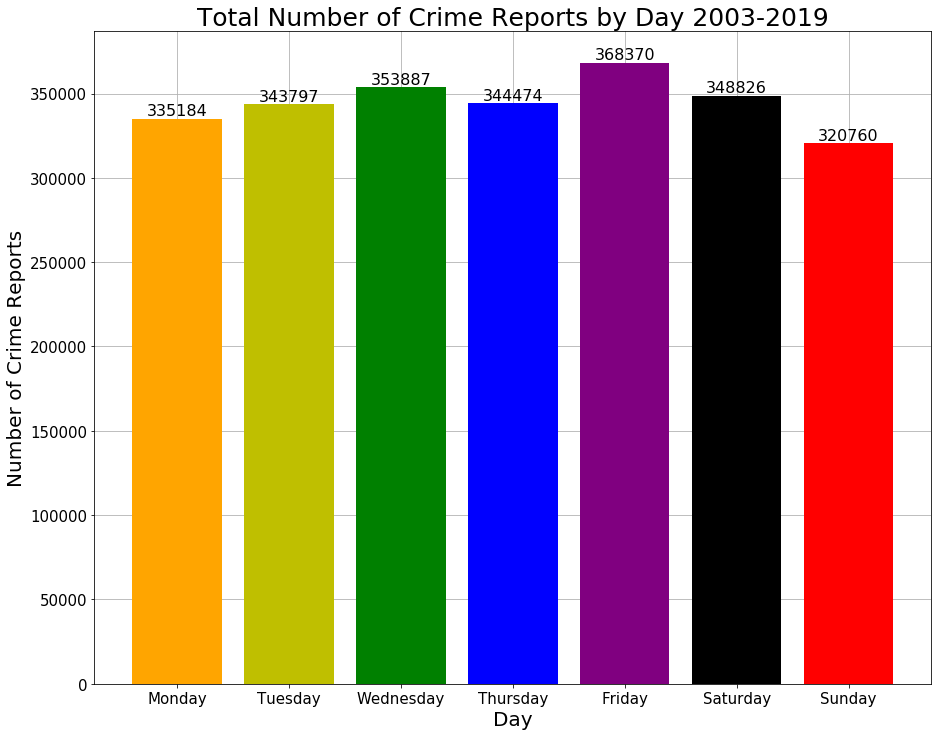

In [14]:
# Create figure to display crimes reported per day of the week
fig, ax = plt.subplots(figsize=(15, 12))

# Set title and axis labels
ax.set_title("Total Number of Crime Reports by Day 2003-2019", fontsize=25)
ax.set_xlabel("Day", fontsize=20)
ax.set_ylabel("Number of Crime Reports", fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

# List of bar characteristics
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
totals = []
colors = ['orange', 'y', 'green', 'blue', 'purple', 'black', 'red']

for day in days:
    total = sum(sf_days == day)
    totals.append(total)

ax.grid(zorder=0)
plot = plt.bar(days, totals, color=colors, zorder=3)

for bar in plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', fontsize=16)

plt.show()

# # LINE PLOT
# for day in days.unique():
#     totals = []
#     for year in years.unique():
#         sf_year_crime = sf_date_times[sf_date_times["Incident Year"] == year]
#         year_totals = len(sf_year_crime[sf_year_crime["Incident Day of Week"] == day])
#         totals.append(year_totals)
#     plt.plot(years.unique(), totals, 'o-', color=colors[c])
#     c += 1

# ax.set_xlim(2003, 2018)
# ax.set_ylim(16000, 24000)
# plt.legend(days.unique(), loc='lower right', prop={'size': 18})

# Add footnote
# plt.annotate('Note: The y-axis does not begin at 0 to accentuate the difference in crime reports over the years', (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=12)

# plt.show()



# BAR GRAPH
# for year in years.unique():
#     sf_year_crime = sf_date_times[sf_date_times["Incident Year"] == year]
#     totals = []
#     for day in days.unique():
#         day_total = len(sf_year_crime[sf_year_crime["Incident Day of Week"] == day])
#         totals.append(day_total)
#     plt.bar(days.unique(), totals, color=colors)
#     plt.show()

From the graph, it appears that the most common day for crimes to occur is on Fridays. Fridays mark the start of the weekend and it is common to find people out both after work and at night, so it is reasonable that this day could be very prone to crime. The drop in crime reports for Sunday compared to the other days is interesting. Although this difference of 47,610 reports is small compared to the 2,415,298 total reports, the crime pattern between the beginning and end of the weekend could still affect the probability of crimes being reported.

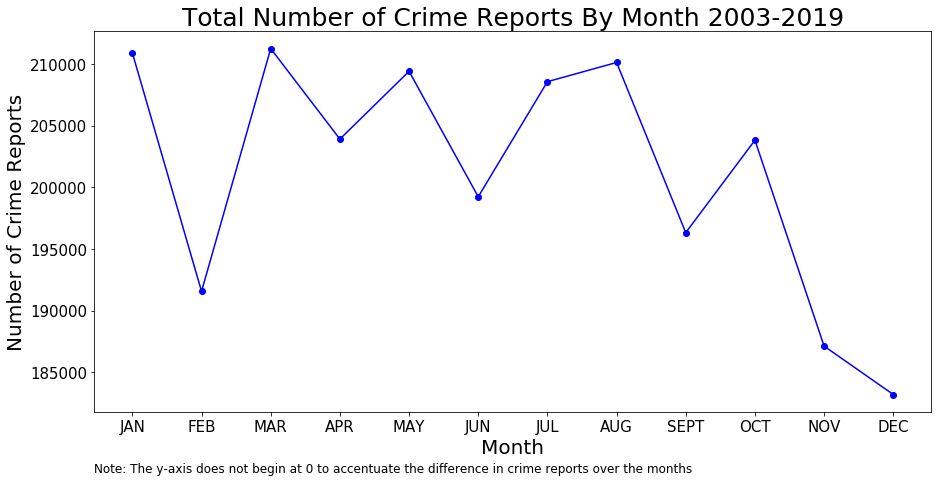

In [88]:
# Create figure for number of crime reports per month
fig, ax = plt.subplots(figsize=(15, 7))

# Set title and axis labels
ax.set_title("Total Number of Crime Reports By Month 2003-2019", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel("Number of Crime Reports", fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

# Set plot characteristics
months = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEPT", "OCT", "NOV", "DEC"]

# Plot
ax.plot(sf_months.value_counts().sort_index().index, sf_months.value_counts().sort_index().values, 'o-b')

# Change x-axis labels to month names
ax.set_xticks(sf_months.value_counts().sort_index().index)
ax.set_xticklabels(months)

# Add footnote
plt.annotate('Note: The y-axis does not begin at 0 to accentuate the difference in crime reports over the months', (0,0), (0, -50), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=12)

plt.show()

From the graph, it appears that crime is more common in the first half of the year compared to the second half. At its peak, the most crime reports are shown to happen in Janurary and March, with the least happening in November and December. There is also a drop in February between the two highest months that is a noticeable difference compared to the surrounding months.

# Are crimes more likely at certain times of the day?

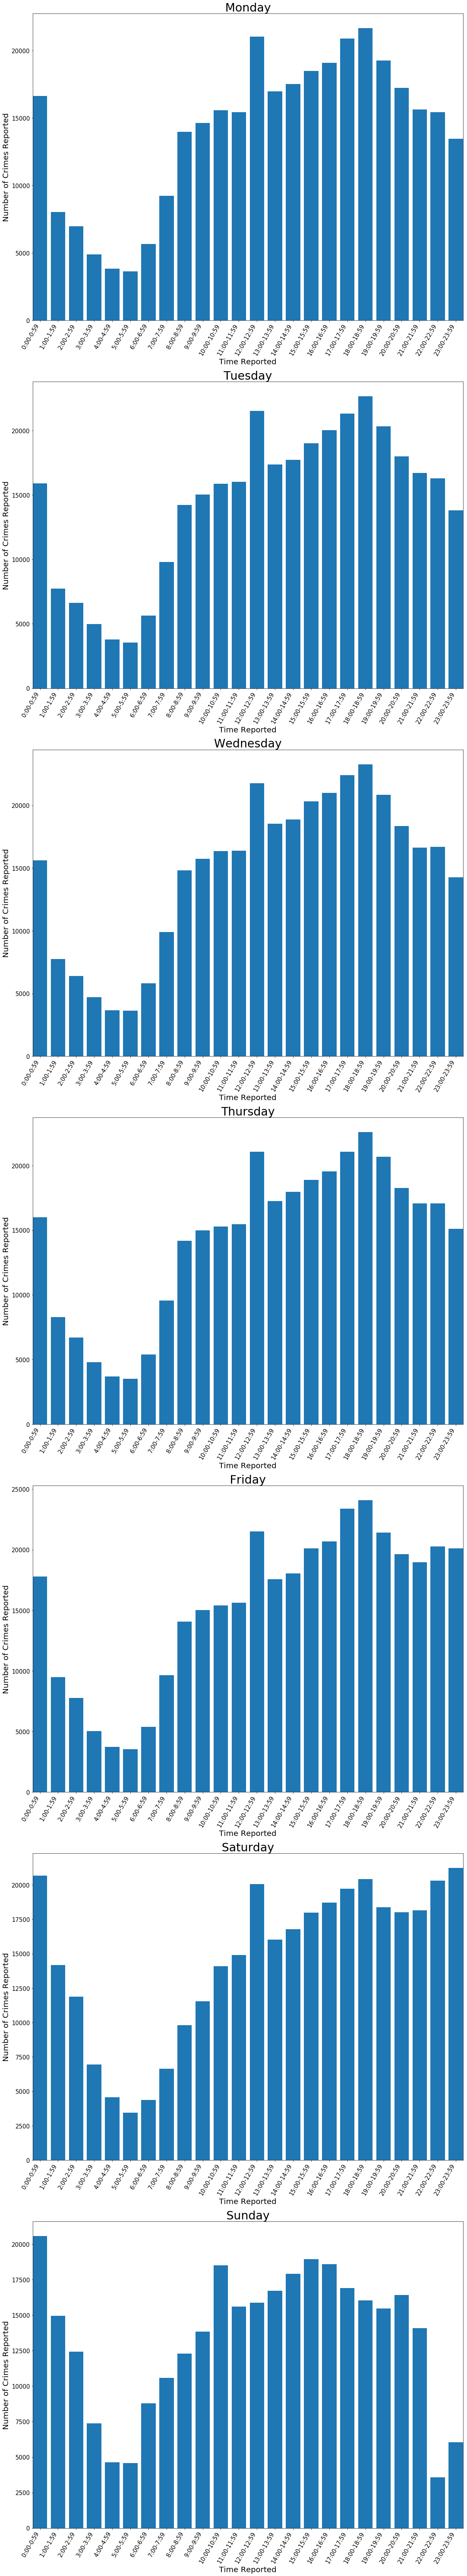

In [173]:
fig = plt.figure(figsize=(20, 120))
i = 1

# Set variable to remember time buckets for bar chart
buckets = ["0:00-0:59", "1:00-1:59", "2:00-2:59", "3:00-3:59", "4:00-4:59", "5:00-5:59", "6:00-6:59", "7:00-7:59", "8:00-8:59", "9:00-9:59", "10:00-10:59", "11:00-11:59", "12:00-12:59", "13:00-13:59", "14:00-14:59", "15:00-15:59", "16:00-16:59", "17:00-17:59", "18:00-18:59", "19:00-19:59", "20:00-20:59", "21:00-21:59", "22:00-22:59", "23:00-23:59"]

for day in days:
    times = sf_date_times[sf_date_times["Incident Day of Week"] == day]["Incident Time"]
    hours = list(range(0,24))
    counts = dict()
    
    for time in times:
        hour, minute = time.split(':')
        counts[hour] = counts.get(hour, 0) + 1
    
    ax = fig.add_subplot(7, 1, i)
    ax.set_title(day, fontsize=30)
    ax.set_xlabel("Time Reported", fontsize=20)
    ax.set_ylabel("Number of Crimes Reported", fontsize=20)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
    ax.bar(buckets, counts.values())
    plt.margins(x=0)
    #plt.xticks(rotation='vertical')
    ax.set_xticklabels(buckets, rotation=60, ha='right')
    i += 1

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday


In [15]:
# Some code for looking into 'Resolution Column'
# len(df[df.Resolution == 'ARREST, BOOKED']) + len(df[df.Resolution == 'ARREST, CITED']) + len(df[df.Resolution == 'Cite or Arrest Adult']) + len(df[df.Resolution == 'Cite or Arrest Juvenile'])
# resolution_col = df['Resolution'].str.lower()
# resolution_col.unique()
# resolution_col.where(resolution_col.str.contains('arrest')).count()